**LIBRARIES**

In [ ]:
# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor



**DATA LOADING, VISUALIZATION & EDA**

In [ ]:
# Uploading the dataset
from google.colab import files
uploaded = files.upload()

Saving CCPP_data.csv to CCPP_data.csv


In [ ]:
# Loading the CSV file into a DataFrame
data = pd.read_csv("CCPP_data.csv")

Displaying first 5 and last 5 rows


In [ ]:
# Displaying the first few rows of the dataset to verify it loaded correctly
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
# Displaying last 5 rows of the dataset
data.tail()

,AT,V,AP,RH,PE
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


Shape

In [ ]:
print("Dataset Shape:", data.shape)

Dataset Shape: (9568, 5)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


Checking for any null entries

In [ ]:
print("\nNull Values in Each Column:")
print(data.isnull().sum())



Null Values in Each Column:
AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


Statistical Summary

In [ ]:
print("\nStatistical Summary:")
print(data.describe())


Statistical Summary:
                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000


Seaborn Plotting


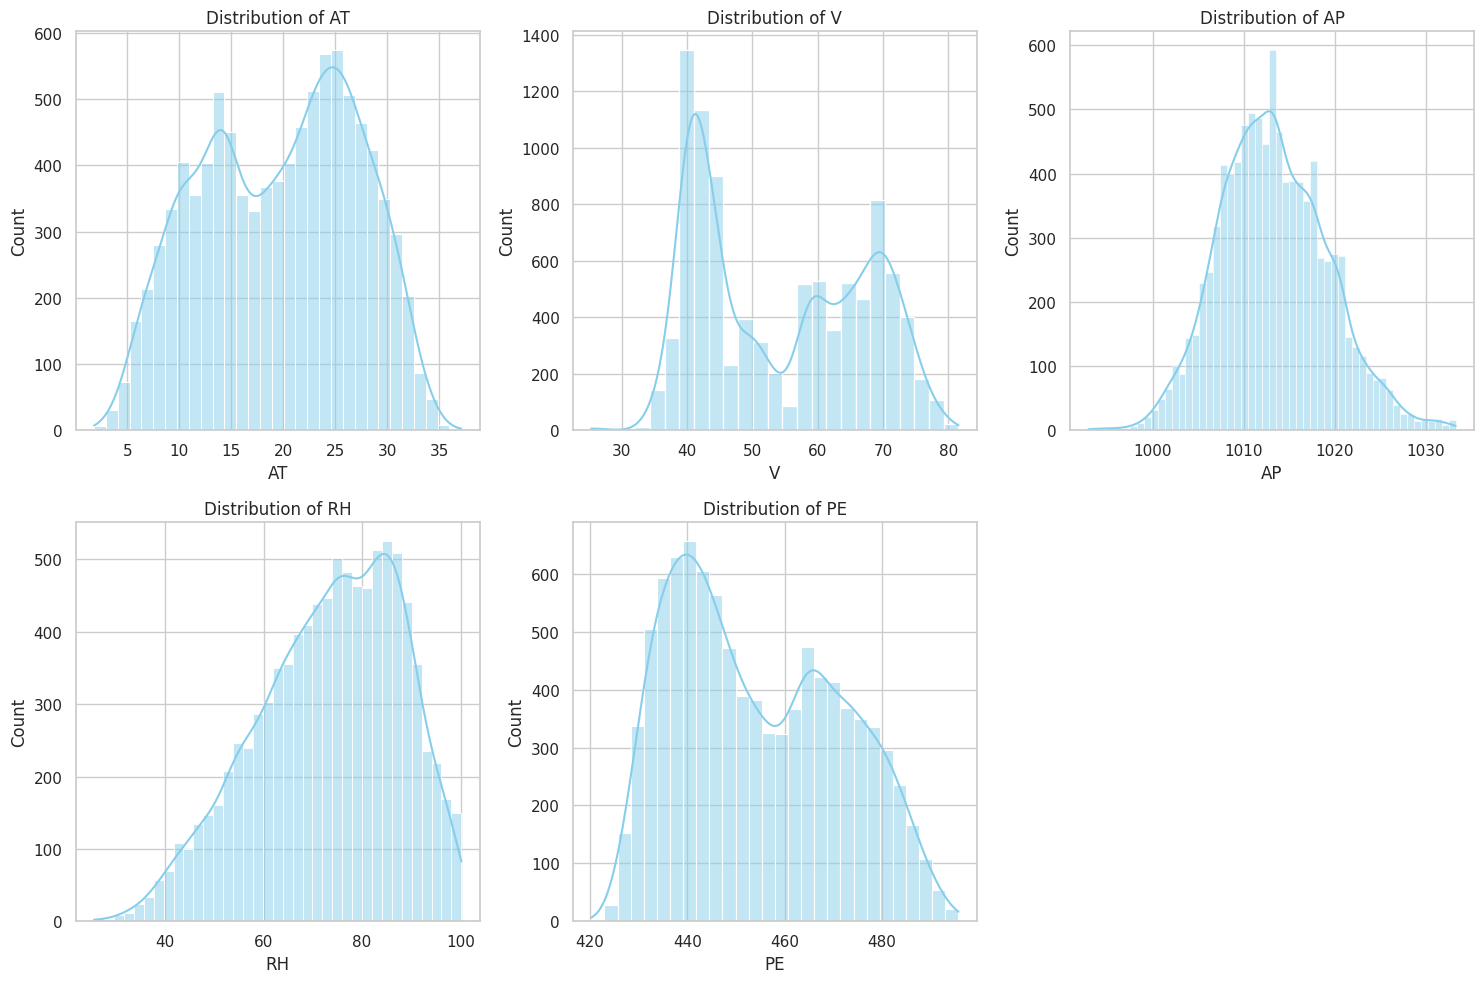

In [ ]:
# Set a style for seaborn
sns.set(style="whitegrid")

# 1. Distribution Plots for each feature and the target variable
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

**PAIR-PLOTTING BETWEEN FEATURES AND TARGET**


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector,

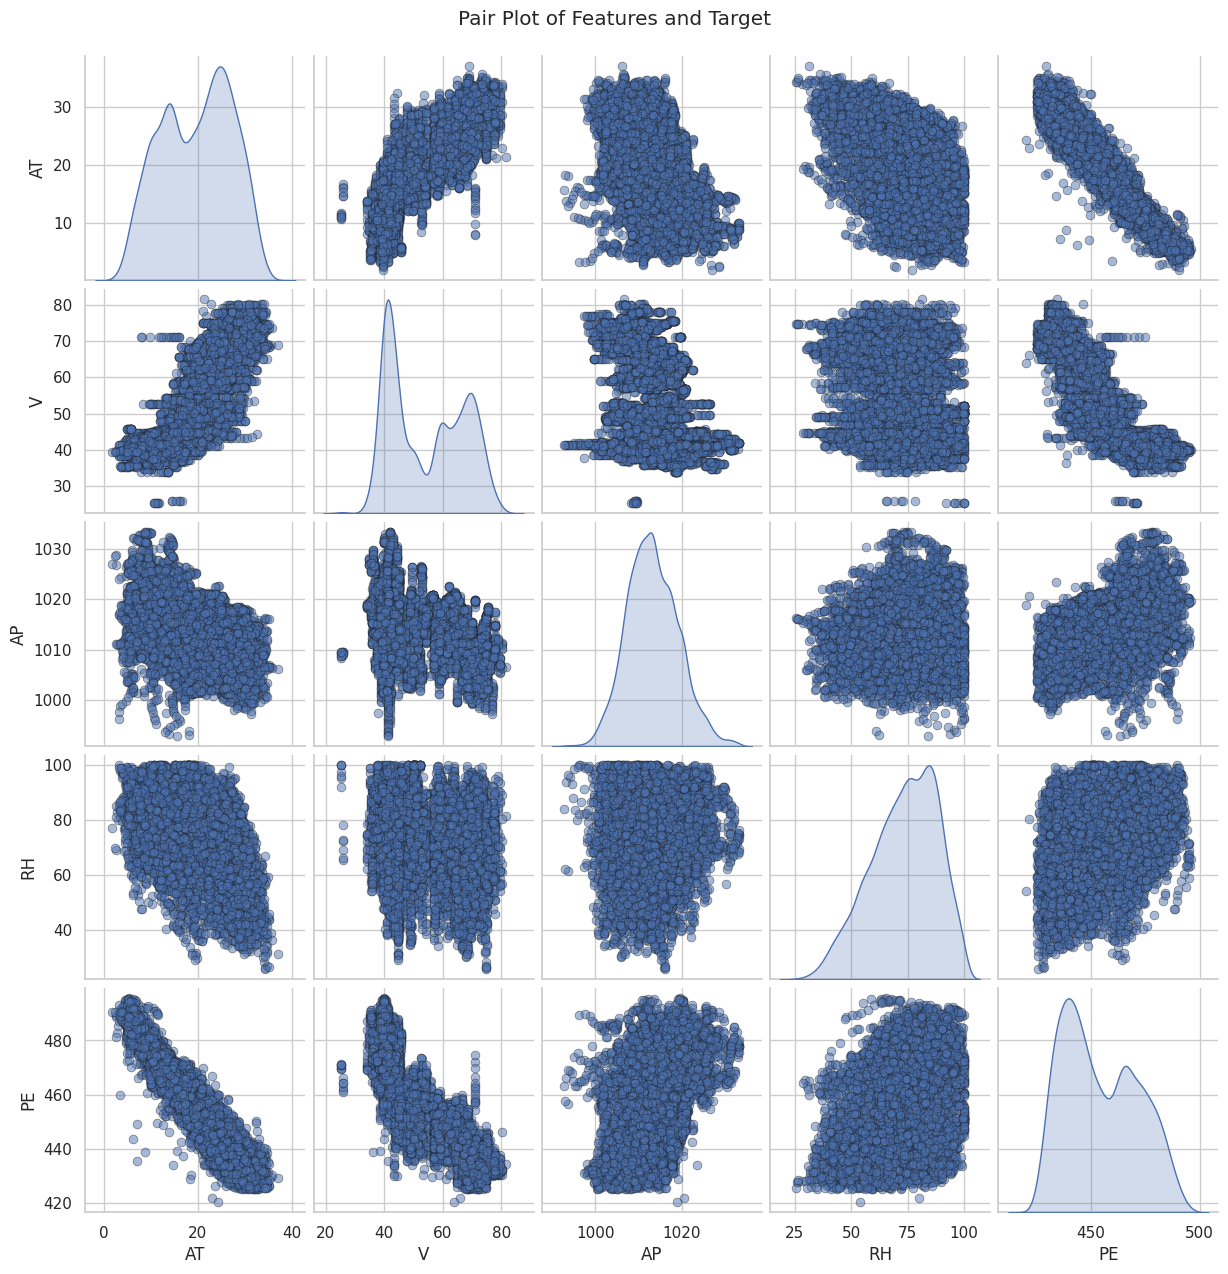

In [ ]:
# 2. Pair Plot to show relationships between features and target
sns.pairplot(data, diag_kind="kde", plot_kws={"alpha": 0.5, "s": 40, "edgecolor": "k"}, diag_kws={"shade": True})
plt.suptitle("Pair Plot of Features and Target", y=1.02)
plt.show()

**CORRELATION HEATMAP OF FEATURES**

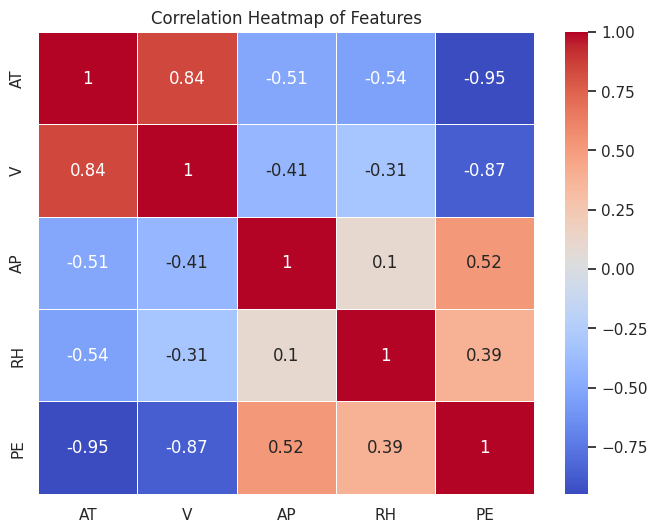

In [ ]:
plt.figure(figsize=(8, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

**SCATTER-PLOTTING OF FEATURES AGAINST TARGET**

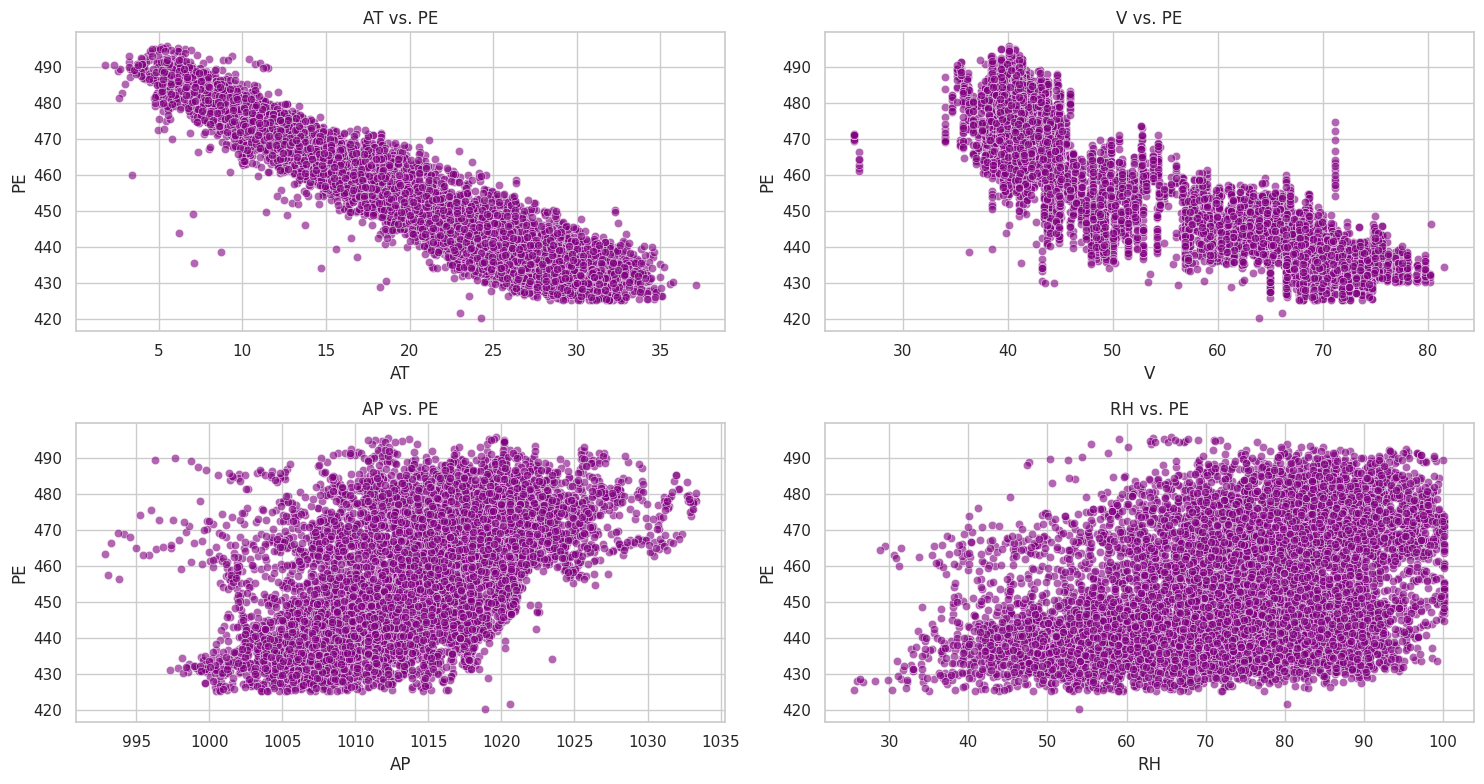

In [ ]:
# 4. Scatter Plots for each feature against the target (PE)
plt.figure(figsize=(15, 8))
for i, column in enumerate(data.columns[:-1], 1):  # excluding the target column from the loop
    plt.subplot(2, 2, i)
    sns.scatterplot(x=data[column], y=data['PE'], alpha=0.6, color='purple')
    plt.title(f'{column} vs. PE')
    plt.xlabel(column)
    plt.ylabel('PE')
plt.tight_layout()
plt.show()

**BOX-PLOTTING OF EACH COLUMN**

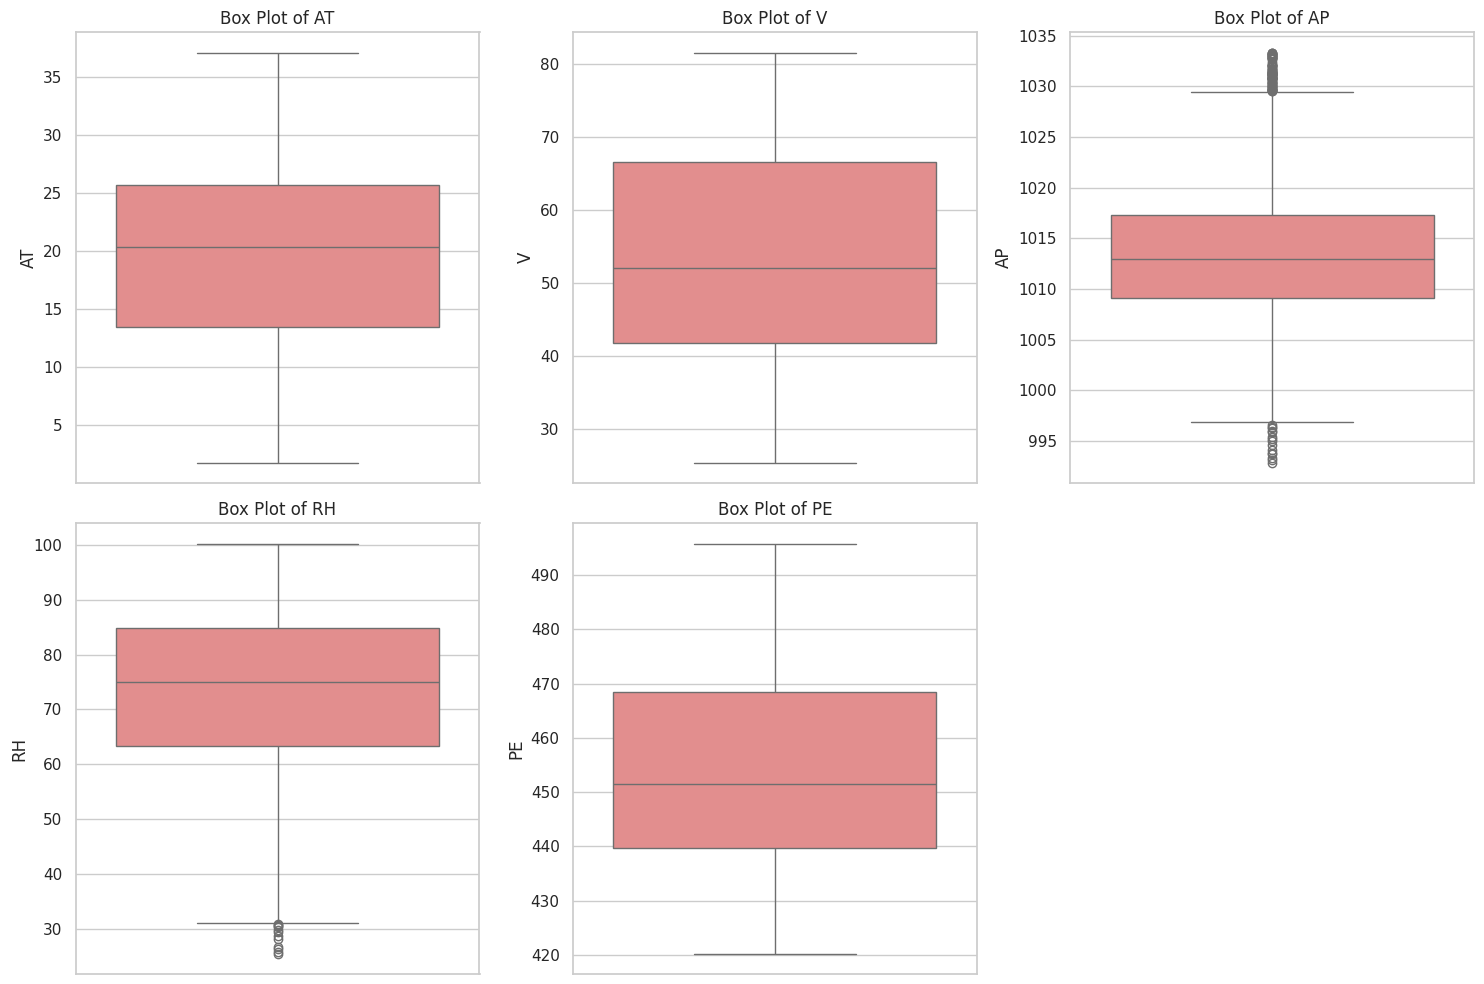

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[column], color='lightcoral')
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

**FINDING OUTLIER RANGE FOR EACH FEATURE**

In [ ]:
# Define expected ranges for each feature
expected_ranges = {
    'AT': (1.81, 37.11),
    'V': (25.36, 81.56),
    'AP': (992.89, 1033.30),
    'RH': (25.56, 100.16),
    'PE': (420.26, 495.76)
}

# Check for any values outside the expected ranges
for column, (min_val, max_val) in expected_ranges.items():
    out_of_range = data[(data[column] < min_val) | (data[column] > max_val)]
    if not out_of_range.empty:
        print(f"{column} has values outside the expected range:")
        print(out_of_range)
    else:
        print(f"{column} is within the expected range.")


AT is within the expected range.
V is within the expected range.
AP is within the expected range.
RH is within the expected range.
PE is within the expected range.


**SPLITTING DATA SET INTO TRAIN & TEST SETS**

In [ ]:
# Define features (X) and target variable (y)
X = data[['AT', 'V', 'AP', 'RH']]  # Feature variables
y = data['PE']

In [ ]:

# Split the data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Display the shapes of the resulting datasets
print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)

Training set shape: (7654, 4)
Test set shape: (1914, 4)


**LINEAR REGRESSION MODEL**

In [ ]:
# Initialize and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lin_reg = lin_reg.predict(X_test_scaled)

# Calculate RMSE and R² for Linear Regression
rmse_lin_reg = np.sqrt(mean_squared_error(y_test, y_pred_lin_reg))
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)
# Print the performance of the Linear Regression model
print("Linear Regression Model Performance:")
print(f"RMSE: {rmse_lin_reg:.4f}")
print(f"R²: {r2_lin_reg:.4f}")

Linear Regression Model Performance:
RMSE: 4.5026
R²: 0.9301


**RANDOM FOREST REGRESSOR**

In [ ]:

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define a reduced hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100],             # Use fewer trees to reduce computation
    'max_depth': [10, None],           # Limit the range of depths to search
    'min_samples_split': [2, 5],       # Minimum number of samples required to split a node
    'min_samples_leaf': [1]            # Fixed at 1 to simplify grid
}

# Perform GridSearchCV with a reduced parameter grid and fewer cross-validation folds
grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='neg_mean_squared_error', n_jobs=2)
grid_rf.fit(X_train_scaled, y_train)

# Select the best model
best_rf = grid_rf.best_estimator_

# Make predictions on the test set using the best Random Forest model
y_pred_rf = best_rf.predict(X_test_scaled)

# Calculate RMSE and R² for the Random Forest model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Print the performance of the Random Forest model
print("Random Forest Model Performance:")
print(f"Best Parameters: {grid_rf.best_params_}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R²: {r2_rf:.4f}")


Random Forest Model Performance:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
RMSE: 3.2460
R²: 0.9637


**GRADIENT BOOSTING REGRESSOR**

In [ ]:


# Initialize the Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=42)

# Define a reduced hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100],            # Fewer boosting stages
    'learning_rate': [0.1, 0.2],      # Simplified range for learning rate
    'max_depth': [3, 5]               # Limit depth to lower values to reduce complexity
}

# Perform GridSearchCV with a reduced parameter grid and fewer cross-validation folds
grid_gb = GridSearchCV(gb, param_grid_gb, cv=3, scoring='neg_mean_squared_error', n_jobs=2)
grid_gb.fit(X_train_scaled, y_train)

# Select the best model
best_gb = grid_gb.best_estimator_

# Make predictions on the test set using the best Gradient Boosting model
y_pred_gb = best_gb.predict(X_test_scaled)

# Calculate RMSE and R² for the Gradient Boosting model
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

# Print the performance of the Gradient Boosting model
print("Gradient Boosting Model Performance:")
print(f"Best Parameters: {grid_gb.best_params_}")
print(f"RMSE: {rmse_gb:.4f}")
print(f"R²: {r2_gb:.4f}")


Gradient Boosting Model Performance:
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
RMSE: 3.1713
R²: 0.9653


**ACTUAL VS PREDICTED VALUES PLOTTING**

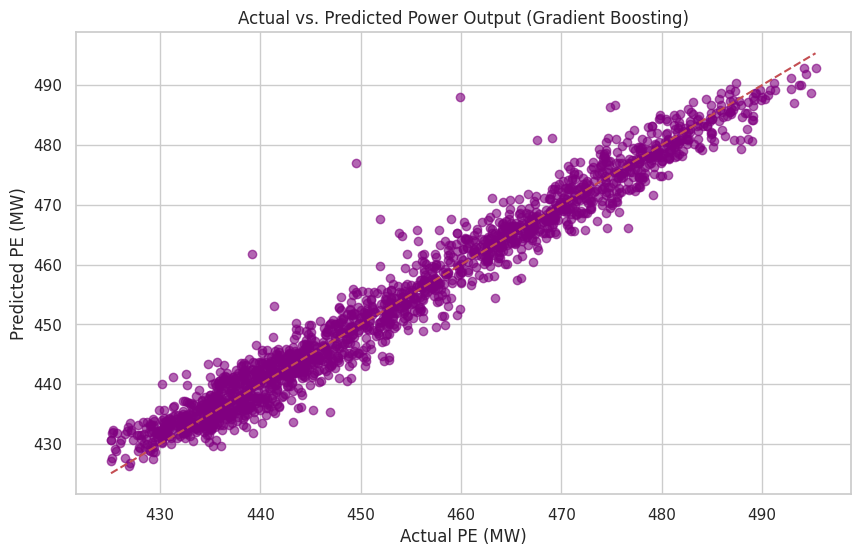

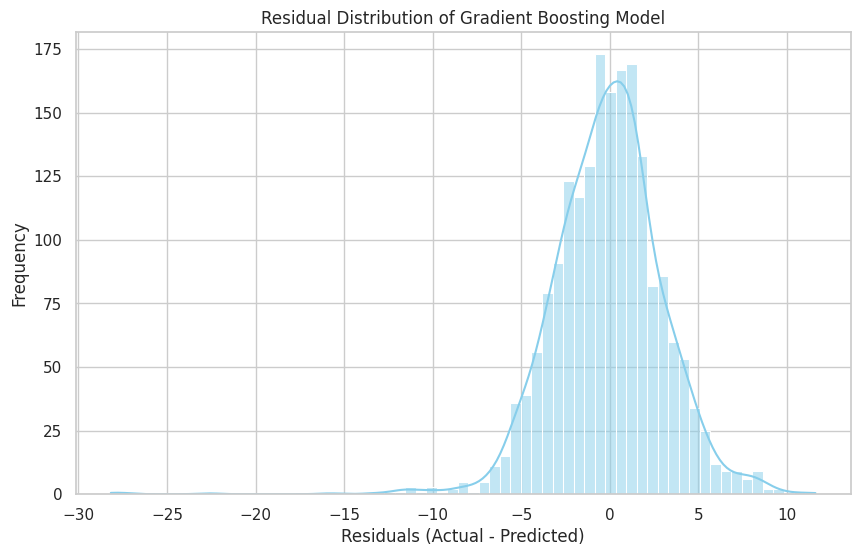

In [ ]:


# Scatter Plot of Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel("Actual PE (MW)")
plt.ylabel("Predicted PE (MW)")
plt.title("Actual vs. Predicted Power Output (Gradient Boosting)")
plt.show()

# Residual Plot
residuals = y_test - y_pred_gb  # Calculate residuals

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='skyblue')
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution of Gradient Boosting Model")
plt.show()
